In [1]:
import os
import math 

from getpass import getpass
from coreapi.auth import BasicAuthentication
from qiskit import BasicAer, execute
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit

from quantuminspire.credentials import get_authentication
from quantuminspire.qiskit import QI
from qiskit.circuit.library.standard_gates import PhaseGate
from qiskit.circuit.library.basis_change import QFT
import numpy as np
import matplotlib.pyplot as plt
import math


QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')



authentication = get_authentication()
QI.set_authentication(authentication, QI_URL)
qi_backend = QI.get_backend('QX single-node simulator')



q = QuantumRegister(3)
b = QuantumRegister(2)
qc = QuantumCircuit(q, b)

qc.draw(output='mpl')

<Figure size 180.108x451.5 with 1 Axes>

In [2]:
def increment(circuit,register,apply_QFT=True):
    q=register
    num=len(q)
    qc=circuit
    
    if apply_QFT== True:
        qc.barrier()
        qc=qc.compose((QFT(num_qubits=num, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=True, name='qft')))
        qc.barrier()
    
    for i,qubit in enumerate(q):
        qc.rz(math.pi/2**(num-1-i), qubit)
    
    if apply_QFT== True:
        qc.barrier()
        qc=qc.compose(QFT(num_qubits=num, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=True, name='iqft'))
        qc.barrier()
    
    return qc
    

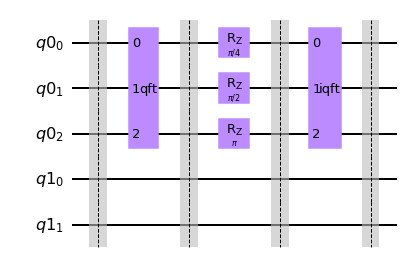

In [3]:
test=increment(qc,q)
test.draw(output='mpl')

In [4]:
def control_increment(circuit,qregister,cregister,apply_QFT=True):
    q=qregister
    c=cregister
    numq=len(q)
    numc=len(c)
    qc=circuit
    if apply_QFT== True:
        qc.barrier()
        qc=qc.compose((QFT(num_qubits=numq, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=True, name='qft')))
        qc.barrier()
    
    for i,qubit in enumerate(q):
        ncp = PhaseGate(math.pi/2**(numq-i-1)).control(numc)
        qc.append(ncp, [*c, qubit])
        
    if apply_QFT== True:
        qc.barrier() 
        qc=qc.compose(QFT(num_qubits=numq, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=True, name='iqft'))
        qc.barrier()
    return qc

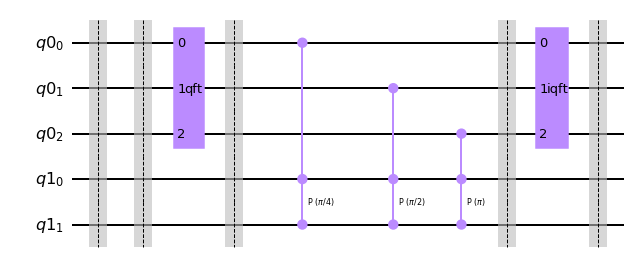

In [5]:
test2=control_increment(qc,q,b)
test2.draw(output='mpl')